In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import streamlit as st  # This is only used in the app part, not required until later


In [2]:
def generate_synthetic_data():
    np.random.seed(42)
    data = pd.DataFrame({
        'Age': np.random.randint(18, 70, 100),
        'Education Level': np.random.choice(['High School', 'Bachelor\'s', 'Master\'s', 'PhD'], 100),
        'Job Title': np.random.choice(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Representative'], 100),
        'Years of Experience': np.random.randint(0, 40, 100),
        'Salary': np.random.uniform(30000, 120000, 100)
    })
    return data


In [3]:
try:
    data = pd.read_csv('Salary.csv')
    print("Loaded Kaggle dataset: Salary.csv")
except FileNotFoundError:
    print("Salary.csv not found. Generating synthetic dataset instead.")
    data = generate_synthetic_data()

# Select relevant features
data = data[['Age', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']]
data = data.dropna()
data.head()


Loaded Kaggle dataset: Salary.csv


,Age,Education Level,Job Title,Years of Experience,Salary
0,25,High School,Sales Representative,2,32000
1,30,Bachelor's,Software Engineer,5,78000
2,45,Master's,Manager,15,95000
3,35,PhD,Data Analyst,8,82000
4,28,Bachelor's,Software Engineer,3,62000


In [4]:
le_education = LabelEncoder()
le_job = LabelEncoder()

data['Education Level'] = le_education.fit_transform(data['Education Level'])
data['Job Title'] = le_job.fit_transform(data['Job Title'])

# Save encoders
joblib.dump(le_education, 'le_education.pkl')
joblib.dump(le_job, 'le_job.pkl')


['le_job.pkl']

In [5]:
X = data[['Age', 'Education Level', 'Job Title', 'Years of Experience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
models = {
    'DecisionTree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = rmse
    print(f'{name} RMSE: {rmse:.2f} USD')


DecisionTree RMSE: 1867.46 USD
XGBoost RMSE: 1570.70 USD


In [7]:
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, 'best_salary_model.pkl')
print(f"Saved best model: {best_model_name}")


Saved best model: XGBoost


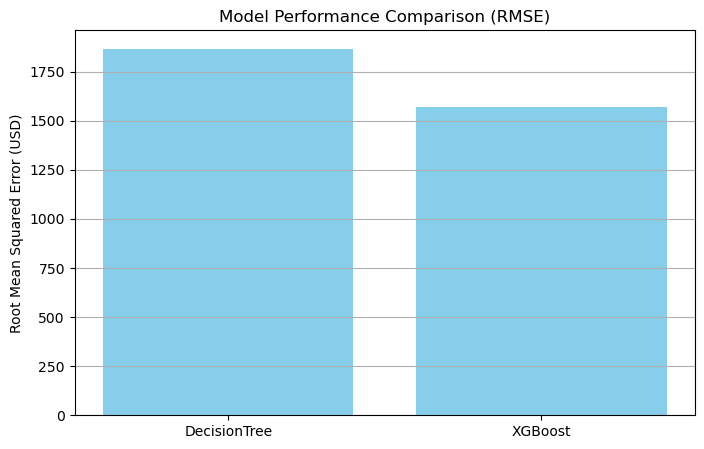

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Performance Comparison (RMSE)')
plt.ylabel('Root Mean Squared Error (USD)')
plt.grid(True, axis='y')
plt.savefig('model_performance.png')
plt.show()


In [ ]:
streamlit run app.py
